# Levich and Koutechy-Levich analysis notebook for CV data.

## 1. Import needed libraries

In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV

## 2.Make a list of paths to the data files.

In [2]:
paths = []
path_to_dataSetFolder = Path(".").cwd().parent.parent / "test_data" /"CV" / "MWE" / "Capacitance"
print(path_to_dataSetFolder)
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
# paths.append( path_to_dataSetFolder / "CV_135307_ 3_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_140548_ 9_MI.tdms")
#paths.append( path_to_dataSetFolder / "CV_142109_ 8_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_123313_ 1_MI")
paths.append( path_to_dataSetFolder / "CV_141031_ 3_MI.tdms")
paths.append( path_to_dataSetFolder / "CV_141010_ 3_MI.tdms")
paths=list(path_to_dataSetFolder.glob("*.tdms"))
print(paths)
[print(x) for x in paths]



c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance
[WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123313_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123315_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123317_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123319_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123321_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123323_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/test_data/CV/MWE/Capacitance/CV_123325_ 1_MI.tdms'), WindowsPath('c:/Users/gustav.wiberg/Documents/GitHub/NordicEC/EC4py/

[None, None, None, None, None, None, None, None, None, None]

## 3. Load in the data files

c:\Users\gustav.wiberg\Documents\GitHub\NordicEC\EC4py\test_data\CV\MWE\Capacitance\CV_123313_ 1_MI.tdms


(<matplotlib.lines.Line2D at 0x1dc022e8a50>,
 <Axes: xlabel='Voltage (V)', ylabel='Current (A)'>)

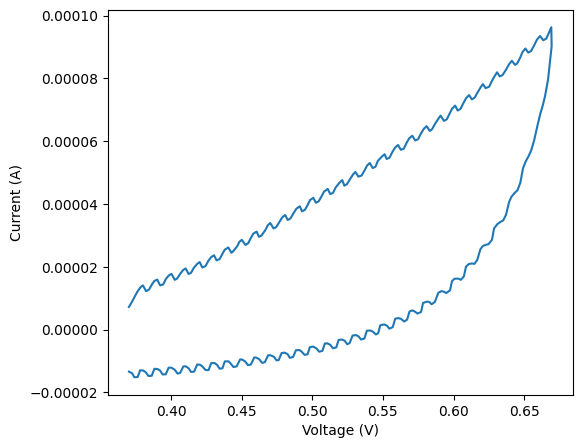

In [3]:
print(paths[0])
EC_Data(paths[0]).plot("E","i_3")

[v = 5.000e-01 V s^-1, v = 5.000e-01 V s^-1, v = 5.000e-01 V s^-1, v = 4.000e-01 V s^-1, v = 4.000e-01 V s^-1, v = 4.000e-01 V s^-1, v = 3.000e-01 V s^-1, v = 3.000e-01 V s^-1, v = 3.000e-01 V s^-1, v = 3.000e-01 V s^-1]


<Axes: xlabel='E vs RHE (V)', ylabel='i v$^{-1}$ (A V$^{-1}$ s)'>

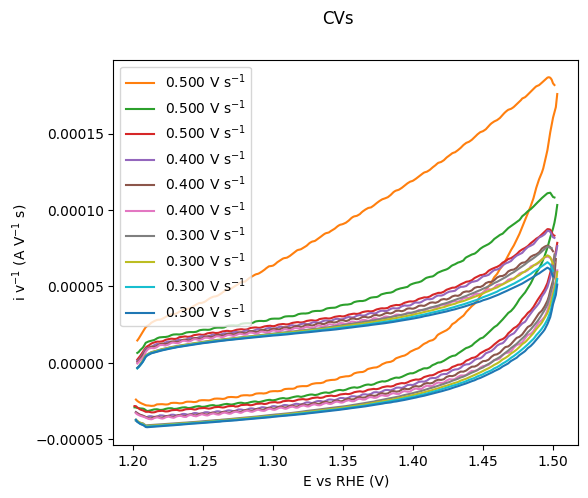

In [4]:
a=CV_Datas(paths,"i_3",y_smooth=5)
print(a.rate)
a.plot(RHE,RATE, LEGEND.RATE)

None
None


(<matplotlib.lines.Line2D at 0x1dc7f780790>,
 <Axes: xlabel='E vs Ag/AgCl (V)', ylabel='i$_{+}$ v$^{-1}$ (A V$^{-1}$ s)'>)

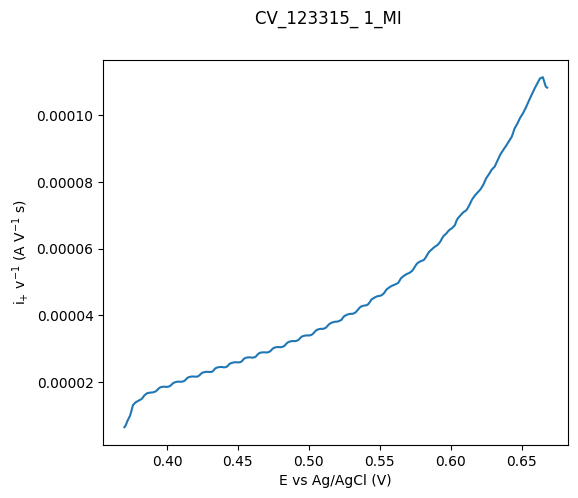

In [5]:
b=a[1].get_sweep(POS)
print(b.norm(RATE))
print(b.norm(POS))
b.plot(POS)

In [6]:
k,i=a.get_i_at_E(0.5,RHE)
print(i)

('R', 'H', 'E')
[i$_{-}$ = -6.642e-06 A, i$_{-}$ = -1.002e-05 A, i$_{-}$ = -1.147e-05 A, i$_{-}$ = -1.003e-05 A, i$_{-}$ = -1.061e-05 A, i$_{-}$ = -1.109e-05 A, i$_{-}$ = -9.129e-06 A, i$_{-}$ = -9.347e-06 A, i$_{-}$ = -9.515e-06 A, i$_{-}$ = -9.661e-06 A]


(<matplotlib.lines.Line2D at 0x1dc09399a10>,
 <Axes: xlabel='E vs RHE (V)', ylabel='i$_{-}$ (A)'>)

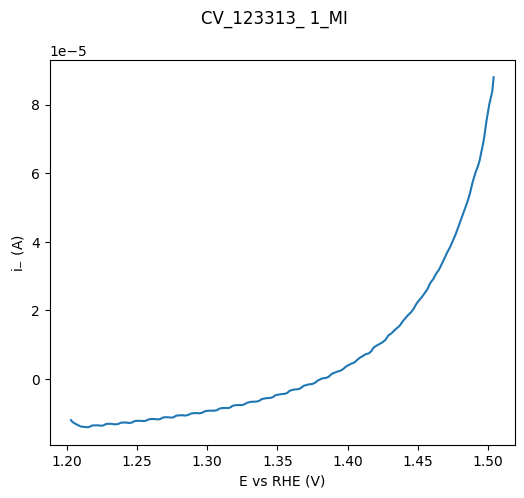

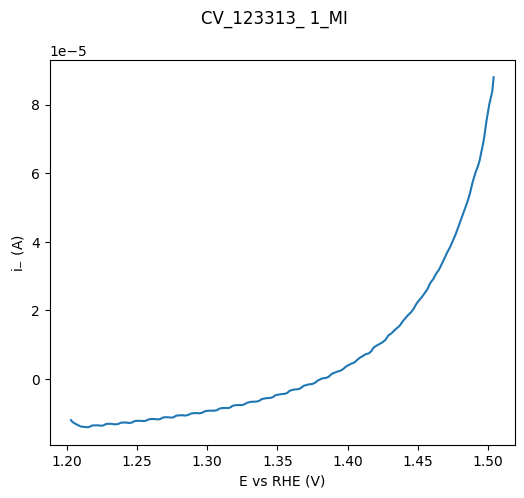

In [7]:
a[0].plot(RHE,NEG, RHE)
b=a[0].get_sweep(NEG)
b.plot(RHE)

In [8]:
op={"dir":"all"}
op["dir"]
print(a[0]._direction("ALL","BAD","AAA",NEG))

neg


('a', 'l', 'l')
Sweep Rate analysis
dir 	pos      	neg     
 :     	F 	F
slope: 	8.62e-05 	-3.43e-07


(i$_{+}$ v^-1 = 8.622e-05 F, i$_{+}$ v^-1 = -3.430e-07 F)

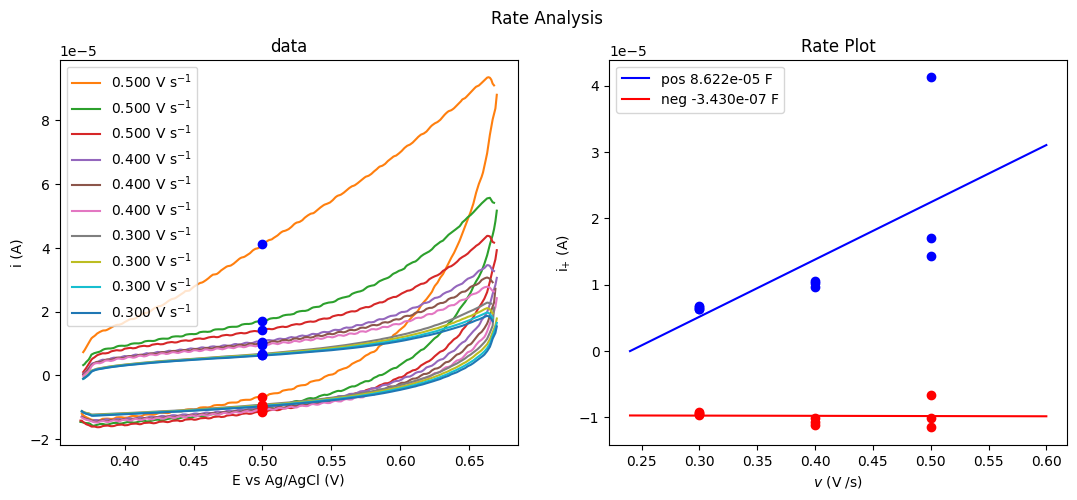

In [ ]:
a.RateAnalysis(.5,R)

('a', 'l', 'l')
RanSev analysis
dir 	pos      	neg     
 :     	A V^-0.5 s^0.5 	A V^-0.5 s^0.5
slope: 	nan 	nan


(i$_{+}$ v^-0.5 = nan A V^-0.5 s^0.5, i$_{+}$ v^-0.5 = nan A V^-0.5 s^0.5)

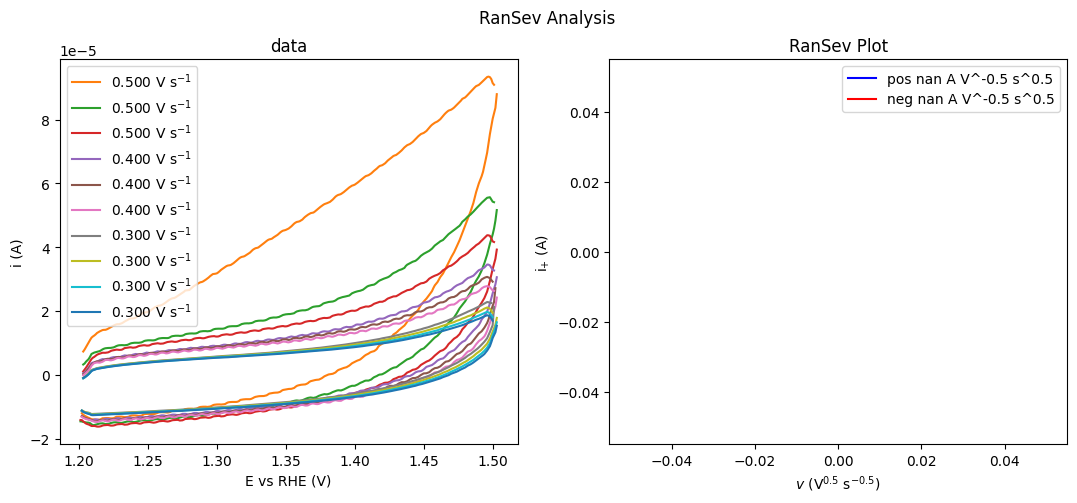

In [10]:
a.RanSev(1.35,RHE)

<Axes: xlabel='E vs Ag/AgCl (V)', ylabel='( i$_{+}$ - i$_{-}$ ) v$^{-1}$ (A V$^{-1}$ s)'>

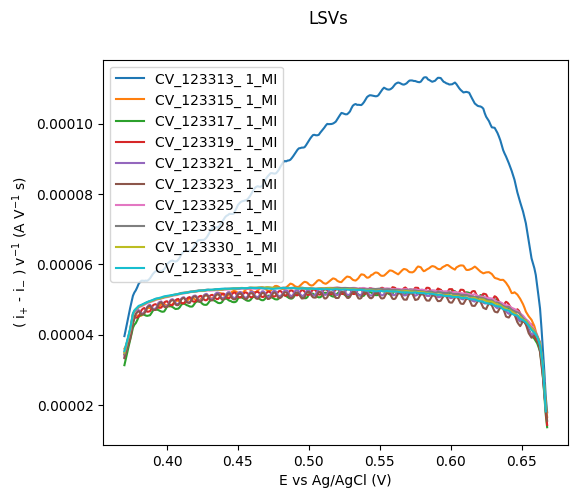

In [11]:
b=a.get_sweep("dif")
b.plot(RATE)


In [12]:
import numpy as np
import pandas as pd

In [13]:
size = [len(a[0].E),len(a.datas)+1]
print(size)
m = np.zeros(size)
m[:,0]=a[0].E
m[:,1]=a[0].get_sweep(POS).i

pd.DataFrame.from_records(m)



[5001, 11]


,0,1,2,3,4,5,6,7,8,9,10
0,-2.500,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-2.499,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.498,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.497,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-2.496,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4996,2.496,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,2.497,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,2.498,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4999,2.499,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
a.export_DataFrame(POS,RHE)

,E,i_CV_123313_ 1_MI / A,i_CV_123315_ 1_MI / A,i_CV_123317_ 1_MI / A,i_CV_123319_ 1_MI / A,i_CV_123321_ 1_MI / A,i_CV_123323_ 1_MI / A,i_CV_123325_ 1_MI / A,i_CV_123328_ 1_MI / A,i_CV_123330_ 1_MI / A,i_CV_123333_ 1_MI / A
0,-2.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2.499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2.497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-2.496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4996,2.496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,2.497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,2.498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4999,2.499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
